In [1]:
#import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
# import seaborn as sns
# import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
#read the dataset

data = pd.read_json('det_ingrs.json')

len(data)

1029720

In [281]:
layer1_data = pd.read_json('layer1.json')

len(data)

1029720

In [282]:
print(len(layer1_data))
print(layer1_data)

1029720
                                               ingredients  \
0        [{'text': '6 ounces penne'}, {'text': '2 cups ...   
1        [{'text': '1 c. elbow macaroni'}, {'text': '1 ...   
2        [{'text': '8 tomatoes, quartered'}, {'text': '...   
3        [{'text': '2 12 cups milk'}, {'text': '1 12 cu...   
4        [{'text': '1 (3 ounce) package watermelon gela...   
...                                                    ...   
1029715  [{'text': '1 cup butter, room temperature'}, {...   
1029716  [{'text': '150 grams Daikon radish'}, {'text':...   
1029717  [{'text': '1 cup apple cider'}, {'text': '6 ta...   
1029718  [{'text': '1 pound ground veal'}, {'text': '1/...   
1029719  [{'text': '8 cups water'}, {'text': '2/3 cup p...   

                                                       url partition  \
0        http://www.epicurious.com/recipes/food/views/-...     train   
1        http://cookeatshare.com/recipes/dilly-macaroni...     train   
2        http://www.foodnetwork

In [152]:
#remove entries with NaN values for columns taken as features
data = data[data['publication_year'].notna()]
data = data[data['authors'].notna()]
data = data[data['num_pages'].notna()]
data = data[data['genre'].notna()]
data = data[data['is_ebook'].notna()]

In [38]:
print(data)

                                                     valid          id  \
0        [True, True, True, True, True, True, True, Tru...  000018c8a5   
1        [True, True, True, True, True, True, True, Tru...  000033e39b   
2        [True, True, True, True, True, True, True, Tru...  000035f7ed   
3               [True, True, True, True, True, True, True]  00003a70b1   
4                           [True, True, True, True, True]  00004320bb   
...                                                    ...         ...   
1029715  [True, True, True, True, True, True, True, Tru...  ffffbb45d2   
1029716                     [True, True, True, True, True]  ffffcd4444   
1029717  [True, True, True, True, True, True, True, Tru...  ffffd33513   
1029718  [True, True, True, True, True, True, True, Tru...  ffffd533d7   
1029719                     [True, True, True, True, True]  ffffdea29a   

                                               ingredients  
0        [{'text': 'penne'}, {'text': 'cheese sauc

In [43]:
ingredients_list = pd.DataFrame(list(data['ingredients']))

In [58]:
def sanitizeString(input):
    output = input
    output = output.lower()
    output = 
    return output

'cheese sauce'

In [67]:


ingredients_list_final = []
ingredients_list_unique = set()

for i in range(len(data)):
    if(i%10000 == 0):
        print(i)
    temp_list = []
    for j in range(99):
        if(ingredients_list[j][i] == None):
            break
        temp_list.append(ingredients_list[j][i]['text'])
    ingredients_list_final.append(temp_list)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000


In [71]:
# Sanitize ingredients list


ingredients_list_unique = set()
for i in range(len(data)):
    for j in range(99):
        if(ingredients_list[j][i] == None):
            break
        ingredients_list_unique.add(ingredients_list[j][i]['text'])
print(len(ingredients_list_unique))

170532


In [75]:
i = 0
for item in ingredients_list_unique:
    i += 1
    print(item)
    if (i == 1000):
        break
    


3 packets Equal sugar substitute
1 lb Puff paste (see below) or possibly thawed frzn puff pastry (+ additional for garnish if you like)
chocolate - covered wafers
1/2 package sweet cream
3 lrg Large eggs beaten lightly
1 jar Diced Pimento (small Jar)
4 thick-cut bacon slices, cut crosswise into 1/4-inch pieces
1 cedar grilling plank
1 Aburaage for Inarizushi
1 pkg. instant pudding
1 ball of focaccia dough (see recipe)
1 recipe Pate Sucree, recipe follows
1 can tomatoes 1 large can, whole tomato
1 lb. (450 g) new potatoes, halved King Sooper's 5 lb For $1.88 thru 02/09
mango and ginger conserve
6 slc Thinly-sliced smoked bacon cut 1" squares
3 cans refrigerated biscuits (cut in quarters)
shrimp flavor ramen noodle soup
1 container fat free sour cream
1 package Dubliner cheddar cheese, cut into slices
cane syrup
2 cups milk 1% or 2 %
1 gal. Golden OREO Pieces-Medium, finely crushed
sassafras leaves
5 cups Raspberry, Frozen Or Fresh (I Used Frozen)
4 Wild Garlic Blossoms, To Garnish
1 ts

In [ ]:
ingredients_list = pd.DataFrame(list(data['ingredients']))
print(ingredients_list)

In [270]:
#Master ingredient list

unique_ingredient_list = np.load('ingredients.npy')

unique_ingredient_list = unique_ingredient_list.tolist()
print(len(unique_ingredient_list))
print(unique_ingredient_list[0:100])


3500
['salt', 'pepper', 'butter', 'garlic', 'sugar', 'flour', 'onion', 'olive oil', 'water', 'ground', 'olive', 'powder', 'sliced', 'eggs', 'black pepper', 'milk', 'cheese', 'cream', 'lemon', 'chicken', 'sauce', 'tomatoes', 'brown', 'white', 'egg', 'onions', 'vinegar', 'vegetable', 'brown sugar', 'lemon juice', 'ground black pepper', 'parsley', 'cinnamon', 'garlic cloves', 'extract', 'vegetable oil', 'vanilla', 'baking powder', 'vanilla extract', 'unsalted butter', 'ginger', 'chocolate', 'leaves', 'soda', 'parmesan', 'tomato', 'celery', 'potatoes', 'kosher salt', 'mustard', 'cheddar', 'juice', 'baking soda', 'kosher', 'sour cream', 'cilantro', 'soy sauce', 'cream cheese', 'parmesan cheese', 'cheddar cheese', 'oregano', 'red pepper', 'carrots', 'clove', 'chicken broth', 'mushrooms', 'honey', 'packed', 'orange', 'bread', 'thyme', 'oil', 'basil', 'seasoning', 'extra', 'margarine', 'mayonnaise', 'bell pepper', 'cayenne', 'garlic powder', 'nutmeg', 'plus', 'cloves', 'garlic minced', 'white 

In [271]:
#Sort by length of data
# unique_ingredient_list = sorted(unique_ingredient_list, key=len, reverse=True)
print(len(unique_ingredient_list))
print(unique_ingredient_list[0:100])

3500
['salt', 'pepper', 'butter', 'garlic', 'sugar', 'flour', 'onion', 'olive oil', 'water', 'ground', 'olive', 'powder', 'sliced', 'eggs', 'black pepper', 'milk', 'cheese', 'cream', 'lemon', 'chicken', 'sauce', 'tomatoes', 'brown', 'white', 'egg', 'onions', 'vinegar', 'vegetable', 'brown sugar', 'lemon juice', 'ground black pepper', 'parsley', 'cinnamon', 'garlic cloves', 'extract', 'vegetable oil', 'vanilla', 'baking powder', 'vanilla extract', 'unsalted butter', 'ginger', 'chocolate', 'leaves', 'soda', 'parmesan', 'tomato', 'celery', 'potatoes', 'kosher salt', 'mustard', 'cheddar', 'juice', 'baking soda', 'kosher', 'sour cream', 'cilantro', 'soy sauce', 'cream cheese', 'parmesan cheese', 'cheddar cheese', 'oregano', 'red pepper', 'carrots', 'clove', 'chicken broth', 'mushrooms', 'honey', 'packed', 'orange', 'bread', 'thyme', 'oil', 'basil', 'seasoning', 'extra', 'margarine', 'mayonnaise', 'bell pepper', 'cayenne', 'garlic powder', 'nutmeg', 'plus', 'cloves', 'garlic minced', 'white 

In [272]:
#Since the most of the ingredients above have the last two words as the most important, we reduce all ingredients to their last two words for simplicity
unique_ingredient_list_copy = unique_ingredient_list
for i in range(len(unique_ingredient_list_copy)):
    
    newword = unique_ingredient_list_copy[i].split()[-2:]
    if len(newword) == 2:
        newword = (newword[0] + ' ' + newword[1])
    else:
        newword = newword[0]
        
#Remove last letter if it is an 's', this helps to standardize plural ingredients
    if (len(newword) > 6 and newword[-3:] == 'ies'):
        newword = newword.rstrip(newword[-3:])
    elif (len(newword) > 5 and newword[-2:] == 'es'):
        newword = newword.rstrip(newword[-1:])

    elif (len(newword) > 4 and newword[-1] == 's'):
        newword = newword.rstrip(newword[-1])
    
    unique_ingredient_list_copy[i] = newword
    
unique_ingredient_list = []
[unique_ingredient_list.append(x) for x in unique_ingredient_list_copy if x not in unique_ingredient_list]
print (len(unique_ingredient_list))
#Remove last ~40 things on list (since they are nonsense)

# unique_ingredient_list = sorted(unique_ingredient_list, key=len, reverse=True)
# unique_ingredient_list = unique_ingredient_list[0:len(unique_ingredient_list) - 35]
print (len(unique_ingredient_list))
print (unique_ingredient_list)

2838
2838
['salt', 'pepper', 'butter', 'garlic', 'sugar', 'flour', 'onion', 'olive oil', 'water', 'ground', 'olive', 'powder', 'sliced', 'eggs', 'black pepper', 'milk', 'cheese', 'cream', 'lemon', 'chicken', 'sauce', 'tomatoe', 'brown', 'white', 'egg', 'vinegar', 'vegetable', 'brown sugar', 'lemon juice', 'parsley', 'cinnamon', 'garlic clove', 'extract', 'vegetable oil', 'vanilla', 'baking powder', 'vanilla extract', 'unsalted butter', 'ginger', 'chocolate', 'leave', 'soda', 'parmesan', 'tomato', 'celery', 'potatoe', 'kosher salt', 'mustard', 'cheddar', 'juice', 'baking soda', 'kosher', 'sour cream', 'cilantro', 'soy sauce', 'cream cheese', 'parmesan cheese', 'cheddar cheese', 'oregano', 'red pepper', 'carrot', 'clove', 'chicken broth', 'mushroom', 'honey', 'packed', 'orange', 'bread', 'thyme', 'oil', 'basil', 'seasoning', 'extra', 'margarine', 'mayonnaise', 'bell pepper', 'cayenne', 'garlic powder', 'nutmeg', 'plus', 'garlic minced', 'white wine', 'bacon', 'ground cinnamon', 'heavy cr

In [273]:
for i in range(len(unique_ingredient_list_copy)):
    
    newword = unique_ingredient_list_copy[i].split()[-2:]
    if len(newword) == 2:
        newword = (newword[0] + ' ' + newword[1])
    else:
        newword = newword[0]

#manually remove items that don't make sense
unique_ingredient_list.remove("water")
unique_ingredient_list.remove("ground")
unique_ingredient_list.remove("powder")
unique_ingredient_list.remove("sliced")
unique_ingredient_list.remove("sauce")
unique_ingredient_list.remove("brown")
unique_ingredient_list.remove("white")
unique_ingredient_list.remove("tomatoe")
unique_ingredient_list.remove("packed")
unique_ingredient_list.remove("plus")
unique_ingredient_list.remove("black")
unique_ingredient_list.remove("green")
unique_ingredient_list.remove("oil")
unique_ingredient_list.remove("red")
unique_ingredient_list.remove("hot water")
unique_ingredient_list.remove("low sodium")
unique_ingredient_list.remove("a")
unique_ingredient_list.remove("in water")
unique_ingredient_list.remove("blend")
unique_ingredient_list.remove("any")
unique_ingredient_list.remove("flavor")
unique_ingredient_list.remove("other")
unique_ingredient_list.remove("cook")
unique_ingredient_list.remove("soda")
unique_ingredient_list.remove("dry")
unique_ingredient_list.remove("bay")
unique_ingredient_list.remove("liquid")
unique_ingredient_list.remove("soft")
unique_ingredient_list.remove("fl")
unique_ingredient_list.remove("smooth")
unique_ingredient_list.remove("easy")
unique_ingredient_list.remove("fresh")
unique_ingredient_list.remove("more")



#since the list is sorted by most common ingredients, take the most common 1000 for simplicity
unique_ingredient_list = unique_ingredient_list[0:1000]
print (len(unique_ingredient_list))

1000


In [274]:
subs = ['potato','water','tomato','cheese','chicken','salt','garlic','sugar','pork','beef','liqueur','rice','cinnamon','ground','dried','frozen','sliced','roasted','cooked','mixed']
#simplify any of the found above terms to just that term, singular. Adjectives like 'ground', 'dried' are also removed
#because it is assumed the base word also appears

for word in subs:
    
    res = [i for i in unique_ingredient_list if word in i]
    for j in range(len(res)):
        if res[j] != word:
            unique_ingredient_list.remove(res[j])

print(len(unique_ingredient_list))

833


In [275]:

subs = 'cheese'
res = [i for i in unique_ingredient_list if subs in i]
print(res)


['cheese']


In [276]:
#Do a string search for every ingredient in this list in the long ingredient string list

ingredients_list_final = []

for i in range(len(data)):
    if(i%100000 == 0):
        print(i)
    temp_list = []
    for j in range(99):
        found_ingredient = False
        if(ingredients_list[j][i] == None):
            break
        for m in range(len(unique_ingredient_list)):
            if ingredients_list[j][i]['text'].find(unique_ingredient_list[m]) != -1:
                temp_list.append(unique_ingredient_list[m])
                found_ingredient = True
                break
                
                
    ingredients_list_final.append(temp_list)


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


In [277]:
print(ingredients_list_final[5000:5010])

[['macaroni', 'cream', 'flour', 'salt', 'garlic', 'cheese', 'bread', 'margarine'], ['sugar', 'salt', 'pepper', 'cumin', 'mustard', 'fillet', 'olive oil'], ['oats', 'flour', 'carrot', 'salt', 'sugar', 'vegetable', 'molasse'], ['roll', 'chicken', 'cheese', 'parsley', 'sherry'], ['lemon', 'lemon', 'egg', 'sugar'], ['bread', 'butter', 'olive oil', 'scallop', 'garlic', 'white wine', 'lemon', 'parsley', 'butter', 'pepper', 'salt'], ['mix', 'flour', 'sugar', 'eggs', 'butter', 'chocolate'], ['canola', 'onion', 'garlic', 'ginger', 'lemon', 'curry', 'pumpkin', 'vegetable', 'salt', 'milk', 'juice', 'cilantro', 'chili'], ['potato', 'egg', 'cheese', 'cheese', 'salt', 'pepper', 'nutmeg', 'flour', 'flour', 'salt', 'leave', 'leave', 'cheese'], ['salt', 'lemon', 'sugar', 'egg', 'vanilla', 'flour', 'baking powder', 'salt', 'blueberr', 'butter']]


In [280]:
#save array
ingredients_list_final_numpy = np.asarray(ingredients_list_final)
np.save('ingredients_list_final.npy', ingredients_list_final_numpy)

In [279]:
print(ingredients_list_final_numpy)

[list(['penne', 'cheese', 'cheese', 'cheese', 'chip', 'salt', 'flour', 'milk', 'cheese', 'cheese', 'salt', 'chip', 'garlic'])
 list(['macaroni', 'cheese', 'celery', 'pepper', 'pimento', 'mayonnaise', 'vinegar', 'salt', 'dill'])
 list(['tomato', 'salt', 'onion', 'pepper', 'pepper', 'pepper', 'cucumber', 'olive oil', 'basil'])
 ...
 list(['apple', 'sugar', 'salt', 'leave', 'chil', 'berr', 'seed', 'mustard', 'coriander', 'pork', 'pepper', 'salt', 'shallot', 'leave', 'brandy', 'cream', 'pork', 'mustard', 'horseradish', 'apple', 'cinnamon', 'apple', 'egg', 'flour', 'flour'])
 list(['round', 'sausage', 'bread', 'milk', 'garlic', 'parsley', 'egg', 'tomato', 'cheese', 'salt', 'tomato', 'pepper'])
 list(['sugar', 'molasse', 'cinnamon', 'coffee'])]


In [133]:

#select columns title, authors, num_pages, age, genre, and average_rating as data
data = data[['authors', 'num_pages','pagesqr', 'age', 'agesqr','genre', 'is_ebook', 'average_rating']]
data['is_ebook'] = data['is_ebook'].astype(int)
#drop null values
data.dropna()

,authors,num_pages,pagesqr,age,agesqr,genre,is_ebook,average_rating
0,"[{'author_id': '3041852', 'role': ''}]",162.0,12.727922,14,3.741657,history,0,4.13
1,"[{'author_id': '37778', 'role': ''}]",400.0,20.000000,11,3.316625,history,0,3.93
2,"[{'author_id': '137561', 'role': ''}]",288.0,16.970563,14,3.741657,history,0,3.98
4,"[{'author_id': '51229', 'role': ''}, {'author_...",332.0,18.220867,8,2.828427,history,1,4.28
6,"[{'author_id': '337108', 'role': ''}, {'author...",659.0,25.670995,14,3.741657,history,0,3.54
...,...,...,...,...,...,...,...,...
8000,"[{'author_id': '8108129', 'role': ''}]",270.0,16.431677,6,2.449490,young adult,1,3.84
8002,"[{'author_id': '614210', 'role': ''}]",199.0,14.106736,6,2.449490,young adult,0,3.79
8003,"[{'author_id': '11664', 'role': ''}]",208.0,14.422205,7,2.645751,young adult,1,4.10
8005,"[{'author_id': '2987125', 'role': ''}, {'autho...",288.0,16.970563,7,2.645751,young adult,0,4.15


In [134]:
#look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 0 to 8006
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         5347 non-null   object 
 1   num_pages       5347 non-null   float64
 2   pagesqr         5347 non-null   float64
 3   age             5347 non-null   int64  
 4   agesqr          5347 non-null   float64
 5   genre           5347 non-null   object 
 6   is_ebook        5347 non-null   int32  
 7   average_rating  5347 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 355.1+ KB


In [44]:
#Anomaly detection

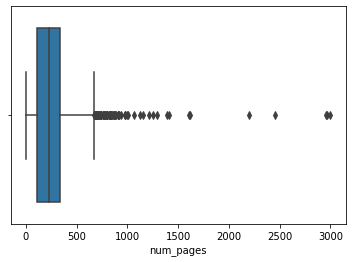

In [45]:
# find no. of pages outliers
# sns.boxplot(x=data['num_pages'])

In [115]:
# remove outliers from no. of pages 
data = data.drop(data.index[data['num_pages'] >= 1500])

In [135]:
len(data)

5347

In [117]:
#Feature Engineering
#Transforming textual features into numerical features

In [136]:
le = preprocessing.LabelEncoder()

In [137]:
#encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [138]:
#encode genre column
data['genre'] = le.fit_transform(data['genre'])

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 0 to 8006
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         5347 non-null   int32  
 1   num_pages       5347 non-null   float64
 2   pagesqr         5347 non-null   float64
 3   age             5347 non-null   int64  
 4   agesqr          5347 non-null   float64
 5   genre           5347 non-null   int32  
 6   is_ebook        5347 non-null   int32  
 7   average_rating  5347 non-null   float64
dtypes: float64(4), int32(3), int64(1)
memory usage: 313.3 KB


In [140]:
#One hot encoding for authors and genre
from sklearn.preprocessing import LabelBinarizer

max_value_authors = data['authors'].max()
max_value_genre = data['genre'].max()
authors_encoder = LabelBinarizer()
genre_encoder = LabelBinarizer()
authors_encoder.fit(data['authors'])
genre_encoder.fit(data['genre'])
transformed_authors = authors_encoder.transform(data['authors'])
transformed_genres = genre_encoder.transform(data['genre'])
onehot_authors_df = pd.DataFrame(transformed_authors)
onehot_genres_df = pd.DataFrame(transformed_genres)
data = pd.concat([data,onehot_authors_df,onehot_genres_df],axis=1).drop(['authors','genre'],axis=1)



In [141]:
# divide the data into attributes and labels
X = data.drop(['average_rating'], axis = 1)
y = data['average_rating']

In [142]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 10)
X_train = torch.tensor(X_train.values).float()
X_test = torch.tensor(X_test.values).float()
y_train = torch.tensor(y_train.values).float()
y_train = torch.unsqueeze(y_train,1)
y_test = torch.tensor(y_test.values).float()
y_test = torch.unsqueeze(y_test,1)


In [159]:
# remove nan values for page number,age,authors
X_train_mask = X_train[:,0].eq(X_train[:,0]) # mask for nan values
X_train_mask = X_train_mask & X_train[:,1].eq(X_train[:,1]) # mask for nan values
X_train_mask = X_train_mask & X_train[:,2].eq(X_train[:,2]) # mask for nan values
X_train_mask = X_train_mask & X_train[:,3].eq(X_train[:,3]) # mask for nan values
X_train_mask = X_train_mask & X_train[:,4].eq(X_train[:,4]) # mask for nan values
X_train_mask = X_train_mask & X_train[:,4].eq(X_train[:,15]) # mask for nan values

X_test_mask = X_test[:,0].eq(X_test[:,0]) # mask for nan values
X_test_mask = X_test_mask & X_test[:,1].eq(X_test[:,1]) # mask for nan values
X_test_mask = X_test_mask & X_test[:,2].eq(X_test[:,2]) # mask for nan values
X_test_mask = X_test_mask & X_test[:,3].eq(X_test[:,3]) # mask for nan values
X_test_mask = X_test_mask & X_test[:,4].eq(X_test[:,4]) # mask for nan values
X_test_mask = X_test_mask & X_test[:,15].eq(X_test[:,15]) # mask for nan values

X_train = X_train[X_train_mask,:]
y_train = y_train[X_train_mask,:]
X_test = X_test[X_test_mask,:]
y_test = y_test[X_test_mask,:]

#normalize pages, age
pages_max = torch.max(X_train[:,0])
age_max = torch.max(X_train[:,1])
pagesqr_max = torch.max(X_train[:,2])
agesqr_max = torch.max(X_train[:,3])

X_train[:,0] = X_train[:,0] / pages_max
X_train[:,1] = X_train[:,1] / age_max
X_train[:,2] = X_train[:,2] / pagesqr_max
X_train[:,3] = X_train[:,3] / agesqr_max

X_test[:,0] = X_test[:,0] / pages_max
X_test[:,1] = X_test[:,1] / age_max
X_test[:,2] = X_test[:,2] / pagesqr_max
X_test[:,3] = X_test[:,3] / agesqr_max
print(X_train)

tensor([[0.0133, 0.1155, 0.0022,  ..., 0.0000, 0.0000, 0.0000],
        [0.0067, 0.0816, 0.0043,  ..., 0.0000, 0.0000, 0.0000],
        [0.0590, 0.2429, 0.0285,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0133, 0.1155, 0.0054,  ..., 0.0000, 0.0000, 0.0000],
        [0.1120, 0.3347, 0.0102,  ..., 0.0000, 1.0000, 0.0000],
        [0.0533, 0.2309, 0.0151,  ..., 0.0000, 0.0000, 0.0000]])


In [160]:
X_train_nan = torch.isnan(X_train)
print(X_train_nan)
print(torch.sum(X_train_nan))

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)
tensor(0)


In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
predictions = lr.predict(X_test)

In [41]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,[3.7100000381469727],[8841.1396484375]
1,[4.429999828338623],[-51359.66015625]
2,[3.680000066757202],[258.14410400390625]
3,[3.7300000190734863],[257.9705505371094]
4,[3.559999942779541],[-4363.0458984375]
5,[3.7799999713897705],[258.25469970703125]
6,[4.110000133514404],[3.910736083984375]
7,[3.990000009536743],[-7972.32958984375]
8,[3.630000114440918],[258.18670654296875]
9,[3.880000114440918],[258.22998046875]


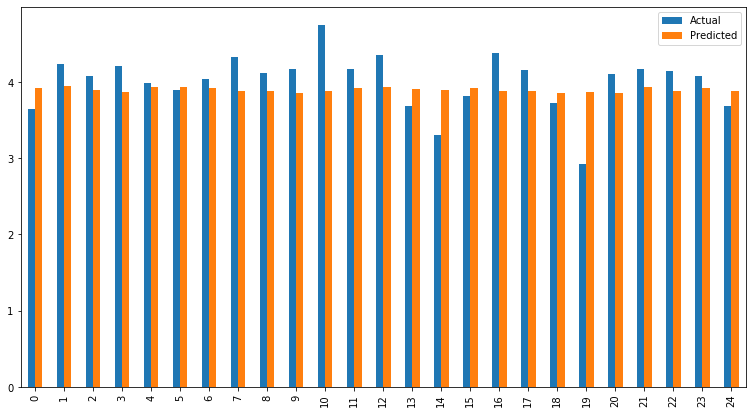

In [60]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

In [61]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2776167878627979
MSE: 0.12774518548521124
RMSE: 0.35741458488037564


In [161]:

print(X_train.shape)

torch.Size([2856, 4413])


In [174]:



class SimpleNet(nn.Module):

  def __init__(self):

    super().__init__()

    self.loss_criterion = nn.MSELoss()
    
    self.fc_layers = nn.Sequential(
          nn.Linear(4413,300),
          nn.ReLU(),
          nn.Linear(300,151),
          nn.ReLU(),
          nn.Linear(151,1)
    )
    

  def forward(self, x: torch.tensor) -> torch.tensor:
    '''
    Perform the forward pass with the net

    '''
    model_output = self.fc_layers(x)
    return model_output


In [176]:
from torch import optim

EPOCHS = 2000

simpleNNmodel = SimpleNet()

for epoch in range(EPOCHS):
    optimizer = optim.SGD(simpleNNmodel.parameters(), lr=0.003)
    epoch_loss = 0
    
    simpleNNmodel.train()
    
    y_train_output = simpleNNmodel(X_train)
    y_test_output = simpleNNmodel(X_test)
    loss = simpleNNmodel.loss_criterion(y_train_output,y_train)
    
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    validation_loss = simpleNNmodel.loss_criterion(y_test_output,y_test)
#     print('MAE:', metrics.mean_absolute_error(y_test_output.detach().numpy(), y_test.detach().numpy()))
#     print('RMSE:', np.sqrt(validation_loss.detach().numpy()))
#     print('R2:', metrics.r2_score(y_test.detach().numpy(), y_test_output.detach().numpy()))
    
    print('Epoch {} Training Loss :{} Test Loss:{}'.format((epoch+1),loss,validation_loss))

Epoch 1 Training Loss :15.735135078430176 Test Loss:15.615273475646973
Epoch 2 Training Loss :15.502562522888184 Test Loss:15.383432388305664
Epoch 3 Training Loss :15.273833274841309 Test Loss:15.155447959899902
Epoch 4 Training Loss :15.048802375793457 Test Loss:14.931161880493164
Epoch 5 Training Loss :14.827361106872559 Test Loss:14.710461616516113
Epoch 6 Training Loss :14.609353065490723 Test Loss:14.493183135986328
Epoch 7 Training Loss :14.394558906555176 Test Loss:14.279114723205566
Epoch 8 Training Loss :14.182868003845215 Test Loss:14.068144798278809
Epoch 9 Training Loss :13.974233627319336 Test Loss:13.860233306884766
Epoch 10 Training Loss :13.768583297729492 Test Loss:13.655309677124023
Epoch 11 Training Loss :13.565756797790527 Test Loss:13.45322036743164
Epoch 12 Training Loss :13.365621566772461 Test Loss:13.253800392150879
Epoch 13 Training Loss :13.168015480041504 Test Loss:13.056900024414062
Epoch 14 Training Loss :12.972800254821777 Test Loss:12.862394332885742
Ep

Epoch 117 Training Loss :0.5501664876937866 Test Loss:0.5176218152046204
Epoch 118 Training Loss :0.5232807397842407 Test Loss:0.49131301045417786
Epoch 119 Training Loss :0.4978817403316498 Test Loss:0.46647846698760986
Epoch 120 Training Loss :0.4739104211330414 Test Loss:0.4430589973926544
Epoch 121 Training Loss :0.45130810141563416 Test Loss:0.4209958612918854
Epoch 122 Training Loss :0.4300164580345154 Test Loss:0.40023040771484375
Epoch 123 Training Loss :0.40997788310050964 Test Loss:0.3807052969932556
Epoch 124 Training Loss :0.3911355435848236 Test Loss:0.36236366629600525
Epoch 125 Training Loss :0.3734337091445923 Test Loss:0.34514981508255005
Epoch 126 Training Loss :0.35681769251823425 Test Loss:0.32900896668434143
Epoch 127 Training Loss :0.3412345051765442 Test Loss:0.31388816237449646
Epoch 128 Training Loss :0.3266320526599884 Test Loss:0.29973551630973816
Epoch 129 Training Loss :0.3129596412181854 Test Loss:0.286500483751297
Epoch 130 Training Loss :0.30016818642616

Epoch 229 Training Loss :0.13409854471683502 Test Loss:0.11935544013977051
Epoch 230 Training Loss :0.13409189879894257 Test Loss:0.11935686320066452
Epoch 231 Training Loss :0.1340855211019516 Test Loss:0.11935821920633316
Epoch 232 Training Loss :0.13407935202121735 Test Loss:0.11935952305793762
Epoch 233 Training Loss :0.1340733915567398 Test Loss:0.11936072260141373
Epoch 234 Training Loss :0.1340676248073578 Test Loss:0.11936185508966446
Epoch 235 Training Loss :0.1340620368719101 Test Loss:0.11936289072036743
Epoch 236 Training Loss :0.13405659794807434 Test Loss:0.11936382949352264
Epoch 237 Training Loss :0.13405130803585052 Test Loss:0.11936469376087189
Epoch 238 Training Loss :0.13404616713523865 Test Loss:0.11936545372009277
Epoch 239 Training Loss :0.13404113054275513 Test Loss:0.1193661093711853
Epoch 240 Training Loss :0.13403621315956116 Test Loss:0.11936668306589127
Epoch 241 Training Loss :0.13403140008449554 Test Loss:0.11936715245246887
Epoch 242 Training Loss :0.134

Epoch 340 Training Loss :0.13366881012916565 Test Loss:0.11918707191944122
Epoch 341 Training Loss :0.13366545736789703 Test Loss:0.11918465793132782
Epoch 342 Training Loss :0.13366210460662842 Test Loss:0.11918222904205322
Epoch 343 Training Loss :0.133658766746521 Test Loss:0.11917981505393982
Epoch 344 Training Loss :0.13365541398525238 Test Loss:0.11917740106582642
Epoch 345 Training Loss :0.13365207612514496 Test Loss:0.11917499452829361
Epoch 346 Training Loss :0.13364875316619873 Test Loss:0.1191725805401802
Epoch 347 Training Loss :0.1336454153060913 Test Loss:0.119170181453228
Epoch 348 Training Loss :0.13364209234714508 Test Loss:0.1191677674651146
Epoch 349 Training Loss :0.13363876938819885 Test Loss:0.11916536837816238
Epoch 350 Training Loss :0.13363544642925262 Test Loss:0.11916296184062958
Epoch 351 Training Loss :0.1336321234703064 Test Loss:0.11916056275367737
Epoch 352 Training Loss :0.13362881541252136 Test Loss:0.11915817111730576
Epoch 353 Training Loss :0.133625

Epoch 451 Training Loss :0.13331811130046844 Test Loss:0.11893542110919952
Epoch 452 Training Loss :0.13331514596939087 Test Loss:0.11893332749605179
Epoch 453 Training Loss :0.1333121657371521 Test Loss:0.11893124878406525
Epoch 454 Training Loss :0.13330921530723572 Test Loss:0.11892915517091751
Epoch 455 Training Loss :0.13330624997615814 Test Loss:0.11892706900835037
Epoch 456 Training Loss :0.13330328464508057 Test Loss:0.11892499029636383
Epoch 457 Training Loss :0.13330033421516418 Test Loss:0.11892291158437729
Epoch 458 Training Loss :0.1332973837852478 Test Loss:0.11892082542181015
Epoch 459 Training Loss :0.13329443335533142 Test Loss:0.1189187616109848
Epoch 460 Training Loss :0.13329148292541504 Test Loss:0.11891668289899826
Epoch 461 Training Loss :0.13328854739665985 Test Loss:0.11891461908817291
Epoch 462 Training Loss :0.13328561186790466 Test Loss:0.11891256272792816
Epoch 463 Training Loss :0.13328267633914948 Test Loss:0.11891049891710281
Epoch 464 Training Loss :0.1

Epoch 561 Training Loss :0.13300912082195282 Test Loss:0.11872240900993347
Epoch 562 Training Loss :0.13300646841526031 Test Loss:0.11872061342000961
Epoch 563 Training Loss :0.133003830909729 Test Loss:0.11871882528066635
Epoch 564 Training Loss :0.1330011934041977 Test Loss:0.11871705204248428
Epoch 565 Training Loss :0.1329985409975052 Test Loss:0.11871527135372162
Epoch 566 Training Loss :0.13299590349197388 Test Loss:0.11871349811553955
Epoch 567 Training Loss :0.13299326598644257 Test Loss:0.11871171742677689
Epoch 568 Training Loss :0.13299062848091125 Test Loss:0.11870995908975601
Epoch 569 Training Loss :0.13298799097537994 Test Loss:0.11870818585157394
Epoch 570 Training Loss :0.13298535346984863 Test Loss:0.11870642751455307
Epoch 571 Training Loss :0.13298273086547852 Test Loss:0.1187046617269516
Epoch 572 Training Loss :0.1329801082611084 Test Loss:0.11870290338993073
Epoch 573 Training Loss :0.13297748565673828 Test Loss:0.11870113015174866
Epoch 574 Training Loss :0.1329

Epoch 671 Training Loss :0.13273289799690247 Test Loss:0.11854054778814316
Epoch 672 Training Loss :0.13273051381111145 Test Loss:0.11853902041912079
Epoch 673 Training Loss :0.13272814452648163 Test Loss:0.11853750795125961
Epoch 674 Training Loss :0.1327257752418518 Test Loss:0.11853598058223724
Epoch 675 Training Loss :0.13272340595722198 Test Loss:0.11853446811437607
Epoch 676 Training Loss :0.13272103667259216 Test Loss:0.11853295564651489
Epoch 677 Training Loss :0.13271866738796234 Test Loss:0.11853145062923431
Epoch 678 Training Loss :0.1327163130044937 Test Loss:0.11852995306253433
Epoch 679 Training Loss :0.13271395862102509 Test Loss:0.11852844059467316
Epoch 680 Training Loss :0.13271158933639526 Test Loss:0.11852693557739258
Epoch 681 Training Loss :0.13270923495292664 Test Loss:0.118525430560112
Epoch 682 Training Loss :0.1327068954706192 Test Loss:0.11852394044399261
Epoch 683 Training Loss :0.13270454108715057 Test Loss:0.11852243542671204
Epoch 684 Training Loss :0.132

Epoch 781 Training Loss :0.1324850171804428 Test Loss:0.11838578432798386
Epoch 782 Training Loss :0.1324828863143921 Test Loss:0.1183844804763794
Epoch 783 Training Loss :0.13248075544834137 Test Loss:0.11838319152593613
Epoch 784 Training Loss :0.13247862458229065 Test Loss:0.11838189512491226
Epoch 785 Training Loss :0.13247649371623993 Test Loss:0.11838061362504959
Epoch 786 Training Loss :0.1324743628501892 Test Loss:0.11837931722402573
Epoch 787 Training Loss :0.1324722319841385 Test Loss:0.11837803572416306
Epoch 788 Training Loss :0.13247011601924896 Test Loss:0.11837674677371979
Epoch 789 Training Loss :0.13246800005435944 Test Loss:0.11837547272443771
Epoch 790 Training Loss :0.13246586918830872 Test Loss:0.11837418377399445
Epoch 791 Training Loss :0.1324637532234192 Test Loss:0.11837290227413177
Epoch 792 Training Loss :0.13246163725852966 Test Loss:0.1183716207742691
Epoch 793 Training Loss :0.13245953619480133 Test Loss:0.11837035417556763
Epoch 794 Training Loss :0.13245

Epoch 891 Training Loss :0.13226141035556793 Test Loss:0.11825399845838547
Epoch 892 Training Loss :0.13225948810577393 Test Loss:0.11825290322303772
Epoch 893 Training Loss :0.13225755095481873 Test Loss:0.11825178563594818
Epoch 894 Training Loss :0.13225562870502472 Test Loss:0.11825069040060043
Epoch 895 Training Loss :0.13225369155406952 Test Loss:0.11824959516525269
Epoch 896 Training Loss :0.1322517693042755 Test Loss:0.11824849247932434
Epoch 897 Training Loss :0.1322498470544815 Test Loss:0.118247389793396
Epoch 898 Training Loss :0.1322479248046875 Test Loss:0.11824630945920944
Epoch 899 Training Loss :0.1322460025548935 Test Loss:0.1182452142238617
Epoch 900 Training Loss :0.1322440803050995 Test Loss:0.11824412643909454
Epoch 901 Training Loss :0.13224217295646667 Test Loss:0.11824304610490799
Epoch 902 Training Loss :0.13224025070667267 Test Loss:0.11824195832014084
Epoch 903 Training Loss :0.13223834335803986 Test Loss:0.11824087053537369
Epoch 904 Training Loss :0.132236

Epoch 1001 Training Loss :0.13205884397029877 Test Loss:0.11814241111278534
Epoch 1002 Training Loss :0.1320571005344391 Test Loss:0.11814147979021072
Epoch 1003 Training Loss :0.1320553421974182 Test Loss:0.1181405559182167
Epoch 1004 Training Loss :0.13205359876155853 Test Loss:0.11813963204622269
Epoch 1005 Training Loss :0.13205184042453766 Test Loss:0.11813870817422867
Epoch 1006 Training Loss :0.13205009698867798 Test Loss:0.11813776940107346
Epoch 1007 Training Loss :0.1320483535528183 Test Loss:0.11813686043024063
Epoch 1008 Training Loss :0.13204661011695862 Test Loss:0.11813593655824661
Epoch 1009 Training Loss :0.13204486668109894 Test Loss:0.1181350126862526
Epoch 1010 Training Loss :0.13204312324523926 Test Loss:0.11813408881425858
Epoch 1011 Training Loss :0.13204137980937958 Test Loss:0.11813317239284515
Epoch 1012 Training Loss :0.1320396363735199 Test Loss:0.11813224852085114
Epoch 1013 Training Loss :0.1320379078388214 Test Loss:0.11813133955001831
Epoch 1014 Training

Epoch 1111 Training Loss :0.13187426328659058 Test Loss:0.11804796755313873
Epoch 1112 Training Loss :0.13187266886234283 Test Loss:0.11804717779159546
Epoch 1113 Training Loss :0.1318710595369339 Test Loss:0.11804639548063278
Epoch 1114 Training Loss :0.13186946511268616 Test Loss:0.11804560571908951
Epoch 1115 Training Loss :0.13186785578727722 Test Loss:0.11804482340812683
Epoch 1116 Training Loss :0.1318662464618683 Test Loss:0.11804403364658356
Epoch 1117 Training Loss :0.13186465203762054 Test Loss:0.11804325878620148
Epoch 1118 Training Loss :0.1318630576133728 Test Loss:0.1180424764752388
Epoch 1119 Training Loss :0.13186146318912506 Test Loss:0.11804169416427612
Epoch 1120 Training Loss :0.13185986876487732 Test Loss:0.11804091930389404
Epoch 1121 Training Loss :0.13185827434062958 Test Loss:0.11804014444351196
Epoch 1122 Training Loss :0.13185667991638184 Test Loss:0.11803936213254929
Epoch 1123 Training Loss :0.1318550854921341 Test Loss:0.1180385872721672
Epoch 1124 Trainin

Epoch 1221 Training Loss :0.13170507550239563 Test Loss:0.11796776205301285
Epoch 1222 Training Loss :0.13170360028743744 Test Loss:0.11796709150075912
Epoch 1223 Training Loss :0.13170213997364044 Test Loss:0.117966428399086
Epoch 1224 Training Loss :0.13170066475868225 Test Loss:0.11796575039625168
Epoch 1225 Training Loss :0.13169918954372406 Test Loss:0.11796509474515915
Epoch 1226 Training Loss :0.13169772922992706 Test Loss:0.11796442419290543
Epoch 1227 Training Loss :0.13169625401496887 Test Loss:0.1179637536406517
Epoch 1228 Training Loss :0.13169479370117188 Test Loss:0.11796309053897858
Epoch 1229 Training Loss :0.13169333338737488 Test Loss:0.11796242743730545
Epoch 1230 Training Loss :0.13169187307357788 Test Loss:0.11796177178621292
Epoch 1231 Training Loss :0.1316903978586197 Test Loss:0.1179611086845398
Epoch 1232 Training Loss :0.1316889375448227 Test Loss:0.11796045303344727
Epoch 1233 Training Loss :0.1316874772310257 Test Loss:0.11795980483293533
Epoch 1234 Training

Epoch 1331 Training Loss :0.13154952228069305 Test Loss:0.11790024489164352
Epoch 1332 Training Loss :0.13154816627502441 Test Loss:0.11789968609809875
Epoch 1333 Training Loss :0.13154681026935577 Test Loss:0.11789912730455399
Epoch 1334 Training Loss :0.13154545426368713 Test Loss:0.11789856851100922
Epoch 1335 Training Loss :0.1315440982580185 Test Loss:0.11789800971746445
Epoch 1336 Training Loss :0.13154274225234985 Test Loss:0.11789745092391968
Epoch 1337 Training Loss :0.1315413862466812 Test Loss:0.11789688467979431
Epoch 1338 Training Loss :0.13154003024101257 Test Loss:0.11789634078741074
Epoch 1339 Training Loss :0.13153867423534393 Test Loss:0.11789578944444656
Epoch 1340 Training Loss :0.1315373331308365 Test Loss:0.11789524555206299
Epoch 1341 Training Loss :0.13153597712516785 Test Loss:0.11789469420909882
Epoch 1342 Training Loss :0.1315346211194992 Test Loss:0.11789413541555405
Epoch 1343 Training Loss :0.13153328001499176 Test Loss:0.11789358407258987
Epoch 1344 Train

Epoch 1441 Training Loss :0.13140560686588287 Test Loss:0.11784350126981735
Epoch 1442 Training Loss :0.1314043402671814 Test Loss:0.11784303188323975
Epoch 1443 Training Loss :0.1314030885696411 Test Loss:0.11784255504608154
Epoch 1444 Training Loss :0.13140182197093964 Test Loss:0.11784208565950394
Epoch 1445 Training Loss :0.13140057027339935 Test Loss:0.11784160882234573
Epoch 1446 Training Loss :0.13139931857585907 Test Loss:0.11784114688634872
Epoch 1447 Training Loss :0.1313980519771576 Test Loss:0.11784066259860992
Epoch 1448 Training Loss :0.1313968002796173 Test Loss:0.11784020066261292
Epoch 1449 Training Loss :0.13139554858207703 Test Loss:0.11783973127603531
Epoch 1450 Training Loss :0.13139429688453674 Test Loss:0.1178392618894577
Epoch 1451 Training Loss :0.13139304518699646 Test Loss:0.1178387999534607
Epoch 1452 Training Loss :0.13139179348945618 Test Loss:0.11783832311630249
Epoch 1453 Training Loss :0.1313905417919159 Test Loss:0.11783786863088608
Epoch 1454 Training

Epoch 1551 Training Loss :0.13127204775810242 Test Loss:0.11779587715864182
Epoch 1552 Training Loss :0.1312708705663681 Test Loss:0.11779548972845078
Epoch 1553 Training Loss :0.1312696933746338 Test Loss:0.11779510974884033
Epoch 1554 Training Loss :0.13126853108406067 Test Loss:0.1177947148680687
Epoch 1555 Training Loss :0.13126735389232635 Test Loss:0.11779431998729706
Epoch 1556 Training Loss :0.13126619160175323 Test Loss:0.11779392510652542
Epoch 1557 Training Loss :0.13126502931118011 Test Loss:0.11779355257749557
Epoch 1558 Training Loss :0.1312638521194458 Test Loss:0.11779315024614334
Epoch 1559 Training Loss :0.13126268982887268 Test Loss:0.1177927777171135
Epoch 1560 Training Loss :0.13126152753829956 Test Loss:0.11779239028692245
Epoch 1561 Training Loss :0.13126036524772644 Test Loss:0.11779200285673141
Epoch 1562 Training Loss :0.13125920295715332 Test Loss:0.11779161542654037
Epoch 1563 Training Loss :0.1312580406665802 Test Loss:0.11779125034809113
Epoch 1564 Trainin

Epoch 1661 Training Loss :0.13114717602729797 Test Loss:0.11775616556406021
Epoch 1662 Training Loss :0.13114608824253082 Test Loss:0.11775582283735275
Epoch 1663 Training Loss :0.13114498555660248 Test Loss:0.11775549501180649
Epoch 1664 Training Loss :0.13114389777183533 Test Loss:0.11775517463684082
Epoch 1665 Training Loss :0.13114279508590698 Test Loss:0.11775483936071396
Epoch 1666 Training Loss :0.13114169239997864 Test Loss:0.1177545040845871
Epoch 1667 Training Loss :0.1311406046152115 Test Loss:0.11775416880846024
Epoch 1668 Training Loss :0.13113950192928314 Test Loss:0.11775383353233337
Epoch 1669 Training Loss :0.131138414144516 Test Loss:0.1177535131573677
Epoch 1670 Training Loss :0.13113731145858765 Test Loss:0.11775318533182144
Epoch 1671 Training Loss :0.1311362236738205 Test Loss:0.11775286495685577
Epoch 1672 Training Loss :0.13113512098789215 Test Loss:0.11775253713130951
Epoch 1673 Training Loss :0.131134033203125 Test Loss:0.11775221675634384
Epoch 1674 Training 

Epoch 1771 Training Loss :0.13102954626083374 Test Loss:0.11772273480892181
Epoch 1772 Training Loss :0.13102850317955017 Test Loss:0.11772245913743973
Epoch 1773 Training Loss :0.1310274749994278 Test Loss:0.11772219091653824
Epoch 1774 Training Loss :0.13102643191814423 Test Loss:0.11772190034389496
Epoch 1775 Training Loss :0.13102540373802185 Test Loss:0.11772164702415466
Epoch 1776 Training Loss :0.13102436065673828 Test Loss:0.11772137135267258
Epoch 1777 Training Loss :0.1310233175754547 Test Loss:0.11772110313177109
Epoch 1778 Training Loss :0.13102228939533234 Test Loss:0.117720827460289
Epoch 1779 Training Loss :0.13102124631404877 Test Loss:0.11772054433822632
Epoch 1780 Training Loss :0.1310202181339264 Test Loss:0.11772028356790543
Epoch 1781 Training Loss :0.13101918995380402 Test Loss:0.11772001534700394
Epoch 1782 Training Loss :0.13101814687252045 Test Loss:0.11771974712610245
Epoch 1783 Training Loss :0.13101711869239807 Test Loss:0.11771948635578156
Epoch 1784 Traini

Epoch 1881 Training Loss :0.13091865181922913 Test Loss:0.11769558489322662
Epoch 1882 Training Loss :0.13091766834259033 Test Loss:0.11769536882638931
Epoch 1883 Training Loss :0.13091668486595154 Test Loss:0.117695152759552
Epoch 1884 Training Loss :0.13091570138931274 Test Loss:0.1176949292421341
Epoch 1885 Training Loss :0.13091473281383514 Test Loss:0.11769470572471619
Epoch 1886 Training Loss :0.13091374933719635 Test Loss:0.11769449710845947
Epoch 1887 Training Loss :0.13091276586055756 Test Loss:0.11769427359104156
Epoch 1888 Training Loss :0.13091179728507996 Test Loss:0.11769405007362366
Epoch 1889 Training Loss :0.13091082870960236 Test Loss:0.11769383400678635
Epoch 1890 Training Loss :0.13090984523296356 Test Loss:0.11769361048936844
Epoch 1891 Training Loss :0.13090887665748596 Test Loss:0.11769338697195053
Epoch 1892 Training Loss :0.13090789318084717 Test Loss:0.11769317090511322
Epoch 1893 Training Loss :0.13090692460536957 Test Loss:0.1176929622888565
Epoch 1894 Train

Epoch 1991 Training Loss :0.1308136284351349 Test Loss:0.11767319589853287
Epoch 1992 Training Loss :0.13081270456314087 Test Loss:0.11767300963401794
Epoch 1993 Training Loss :0.13081176578998566 Test Loss:0.11767283082008362
Epoch 1994 Training Loss :0.13081082701683044 Test Loss:0.1176726296544075
Epoch 1995 Training Loss :0.13080990314483643 Test Loss:0.11767244338989258
Epoch 1996 Training Loss :0.1308089792728424 Test Loss:0.11767224967479706
Epoch 1997 Training Loss :0.1308080404996872 Test Loss:0.11767207086086273
Epoch 1998 Training Loss :0.13080711662769318 Test Loss:0.1176718920469284
Epoch 1999 Training Loss :0.13080619275569916 Test Loss:0.11767170578241348
Epoch 2000 Training Loss :0.13080526888370514 Test Loss:0.11767151206731796


In [37]:

y_test_output = simpleNNmodel(X_test)
# print(y_test_output)

tensor([[3.8886],
        [3.9020],
        [3.8839],
        [3.8785],
        [3.8864],
        [3.9308],
        [3.8793],
        [3.8904],
        [3.8690],
        [3.9171],
        [3.8881],
        [3.8807],
        [3.9163],
        [3.8548],
        [3.8579],
        [3.9277],
        [3.8693],
        [3.8679],
        [3.9061],
        [3.8824],
        [3.8555],
        [3.8780],
        [3.8592],
        [3.8639],
        [3.8823],
        [3.8842],
        [3.8976],
        [3.8843],
        [3.8669],
        [3.8760],
        [3.9087],
        [3.9475],
        [3.9078],
        [3.8602],
        [3.9114],
        [3.8811],
        [3.8731],
        [3.8778],
        [3.8919],
        [3.9504],
        [3.8646],
        [3.9009],
        [3.9045],
        [3.8933],
        [3.8802],
        [3.8740],
        [3.8899],
        [3.9283],
        [3.8792],
        [3.9088],
        [3.8946],
        [3.8833],
        [3.8886],
        [3.9641],
        [3.8726],
        [3